<a href="https://colab.research.google.com/github/aswathi-a31/Internship-Task1/blob/main/Prediction%20using%20Supervised%20ML%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name: Aswathi A

#GRIP: The Sparks Foundation

#Data Science and Business Analytics Intern



#prediction using Supervised ML

#Task 1
In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. We use the data available at http://bit.ly/w-data.








In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

 **Data Importing**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Reading and Preparing Data:**

In [ ]:
data = pd.read_csv('http://bit.ly/w-data')
print('Shape of the dataset is: ', data.shape)
data.head(10)


Shape of the dataset is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Data Pre-processing**

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


<Axes: >

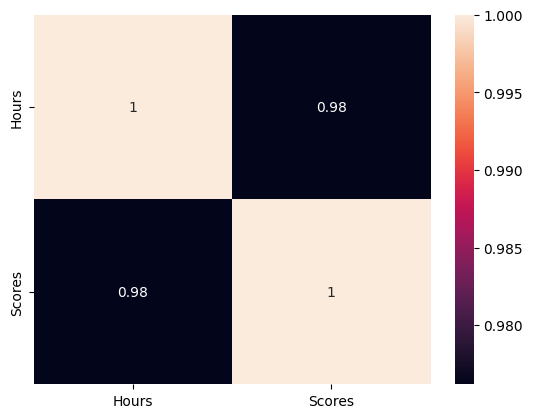

In [ ]:
corr=data.corr()
print(corr)
sns.heatmap(corr, annot=True)

<Axes: xlabel='Hours', ylabel='Scores'>

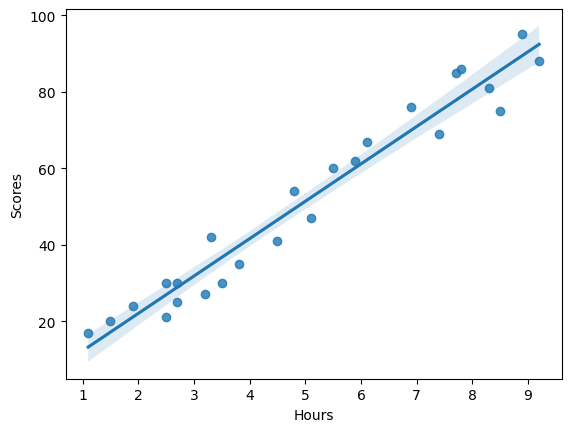

In [ ]:
sns.regplot(x="Hours", y="Scores", data=data)

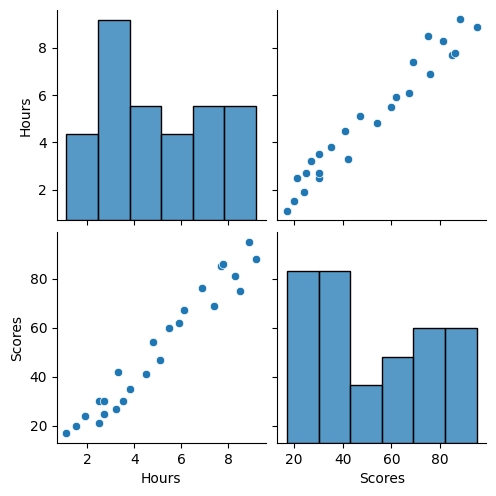

In [ ]:
sns.pairplot(data)

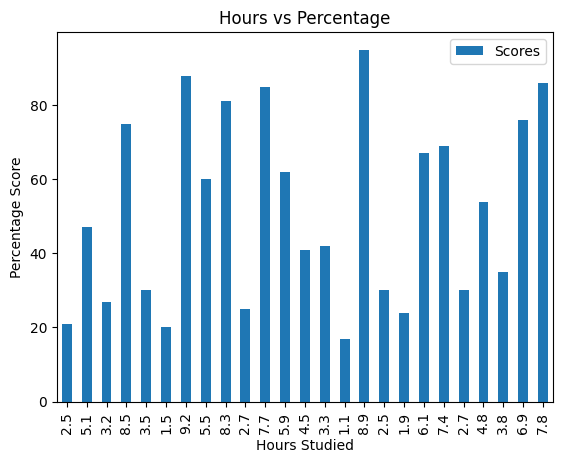

In [ ]:
data.plot(x='Hours', y='Scores', kind='bar')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

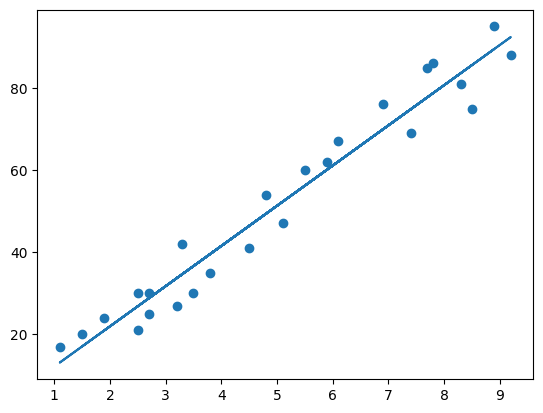

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


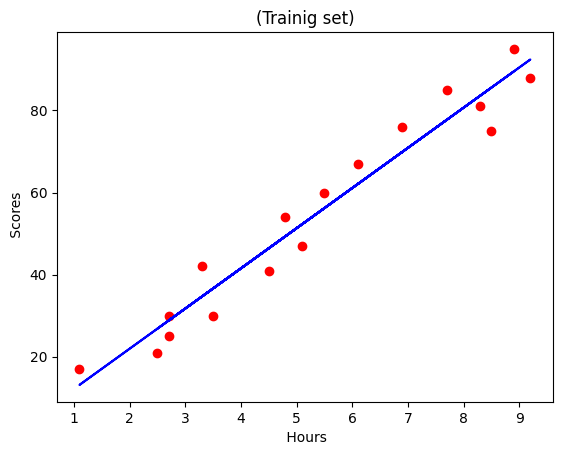

In [ ]:
# PLotting the training set
plt.scatter(X_train,y_train, color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('(Trainig set)')
plt.xlabel(' Hours')
plt.ylabel(' Scores')
plt.show()

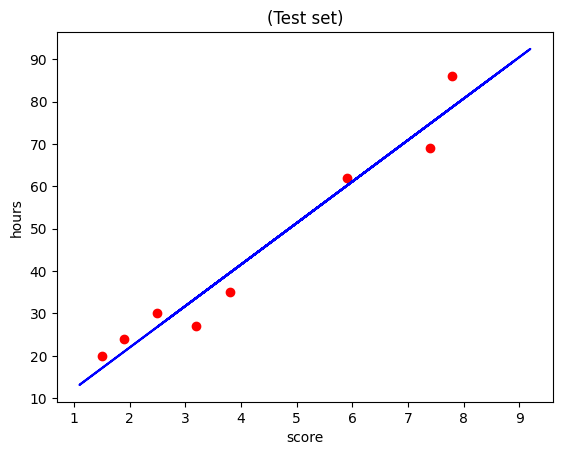

In [ ]:
# PLotting the testing set
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Test set)')
plt.xlabel('score')
plt.ylabel('hours')
plt.show()

In [ ]:
new_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
new_data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


**evaluating the model**

In [ ]:
#calculating r2score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9568211104435257

In [ ]:
#To find the error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

22.965097212700428

**result**

In [ ]:
hours=9.25
own_pred = regressor.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056
